<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data science fundamentals<br/>Asignatura Predictive Analytics</center>

# Worksheet S3: Modelos ARIMA

## Estacionariedad en las series temporales

Tenemos un dataframe con el registro del índice de producción de una fábrica de caramelos

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)
candy

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842
...,...
2018-08-01,112.279777
2018-09-01,123.126335
2018-10-01,123.634268


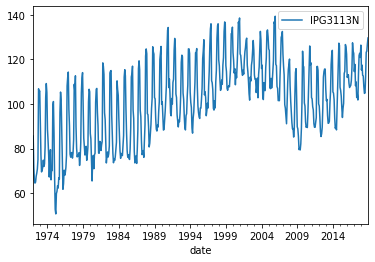

In [3]:
fig, ax = plt.subplots()
candy.plot(ax=ax) 
plt.show()

**P: ¿ Qué componentes tiene esta serie temporal ?**

Tendencia, estacionalidad

**P: ¿Estamos ante una serie temporal estacionaria ?**

No lo es porque tiene tendencia

### Augmented Dicky-Fuller test

In [4]:
# Importar la funcion del test de dickey fuller
from statsmodels.tsa.stattools import adfuller
# Realizamos el test sobre nuestra serie
result = adfuller(candy['IPG3113N'])
# Imprimimos el valor del test estadístico
print(result[0])
# Imprimimos el valor p
print(result[1])

-1.7760153075016136
0.39243275007139866


El valor p  de, test no da por debajo de 0.05, con lo cual nuestra serie no es estacionaria

**P: ¿ Podemos hacer algo al respecto ?**

In [5]:
# Hace el shift y la resta , quitamos la tendencia
candy2 = candy.diff(1).dropna()

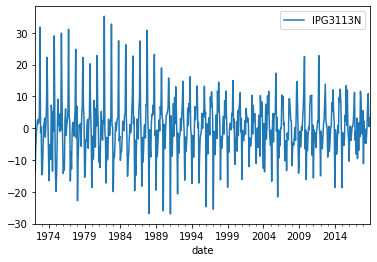

In [6]:
fig, ax = plt.subplots()
candy2.plot(ax=ax) 
plt.show()

In [7]:
result = adfuller(candy2['IPG3113N'])
# Imprimimos el valor del test estadístico
print(result[0])
# Imprimimos el valor p
print(result[1])

# Ahora si esta por debajo de 0,05, por lo tanto podemos decir que tenemos una serie estacionaria.

-6.175912489755629
6.631549159336613e-08


### Otro ejemplo

Población de una ciudad a lo largo de los años

In [8]:
city = pd.read_csv('city_population.csv')
city.index = pd.to_datetime(city.date,format='%Y-%m-%d')
city=city.drop(columns=['date'])

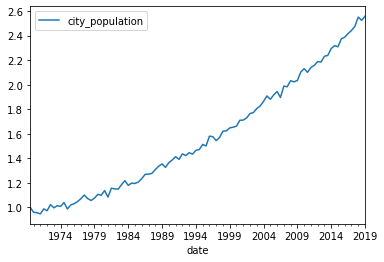

In [9]:
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

**P: ¿ Qué componentes tiene esta serie temporal ?**

tendencia

**P: ¿Estamos ante una serie temporal estacionaria ?**

no

In [10]:
result = adfuller(city['city_population'])
print('ADF Test estadístico:', result[0])
print('Valor p:', result[1])

ADF Test estadístico: 5.297698878151179
Valor p: 1.0


**P: ¿ Podemos hacer alguna transformación para cambiar la situación ?**

In [ ]:
# quitar la tendencia

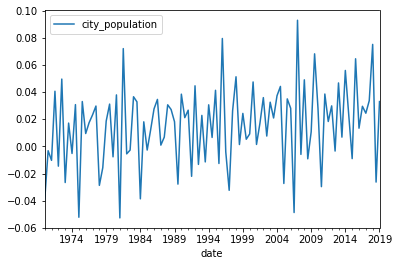

ADF Test estadístico: -0.8146211646181943
Valor p: 0.8147894381484833


In [11]:
city_stationary = city.diff(1).dropna()
result = adfuller(city_stationary['city_population'])
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()
print('ADF Test estadístico:', result[0])
print('Valor p:', result[1])

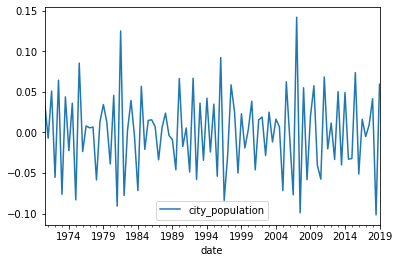

ADF Test estadístico: -6.433646032918657
Valor p: 1.6734498510408087e-08


In [12]:
city_stationary = city.diff().diff().dropna()
result = adfuller(city_stationary['city_population'])
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()
print('ADF Test estadístico:', result[0])
print('Valor p:', result[1])

### Otras transformaciones

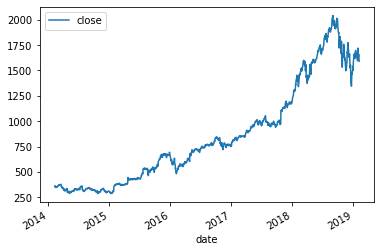

In [13]:
import numpy as np
amazon=pd.read_csv('amazon.csv')
amazon.index = pd.to_datetime(amazon.date,format='%Y-%m-%d')
amazon=amazon.drop(columns=['date'])
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

In [14]:
# Calculamos la primera diferenciación y eliminamos los nans
amazon_diff = amazon.diff().dropna()
result_diff = adfuller(amazon_diff['close'])
print(result_diff[0])
print(result_diff[1])

-7.2035794888112425
2.331271725487213e-10


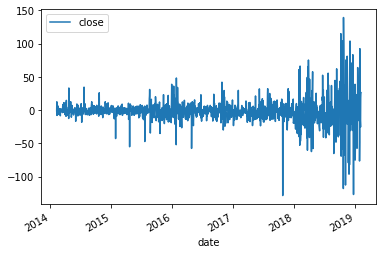

In [15]:
fig, ax = plt.subplots()
amazon_diff.plot(ax=ax)
plt.show()

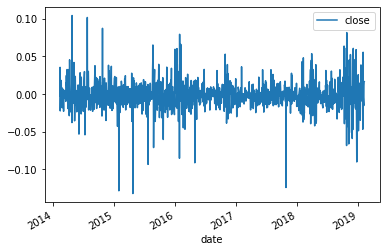

In [16]:
amazon_log = np.log(amazon/amazon.shift()).dropna()
fig, ax = plt.subplots()
amazon_log.plot(ax=ax)
plt.show()

In [17]:
# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log[0])
print(result_log[1])

-34.915748536059674
0.0


### Generando procesos ARMA

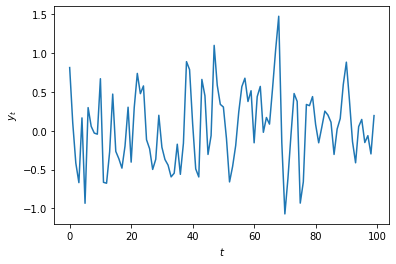

In [18]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)
#MAR2
ar_coefs = [1]
ma_coefs = [1,0.5]

ma1 = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )


plt.plot(ma1)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

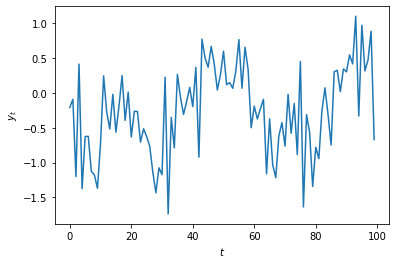

In [19]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

#AR2
ar_coefs = [1,-0.3,-0.5]
ma_coefs = [1]


ar2 = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(ar2)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

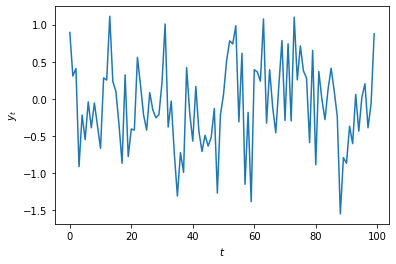

In [21]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)
# ARMA 1-2
# Set coefficients
ar_coefs = [1,0.2]
ma_coefs = [1,0.3,0.4]

# Generate data
arma = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(arma)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

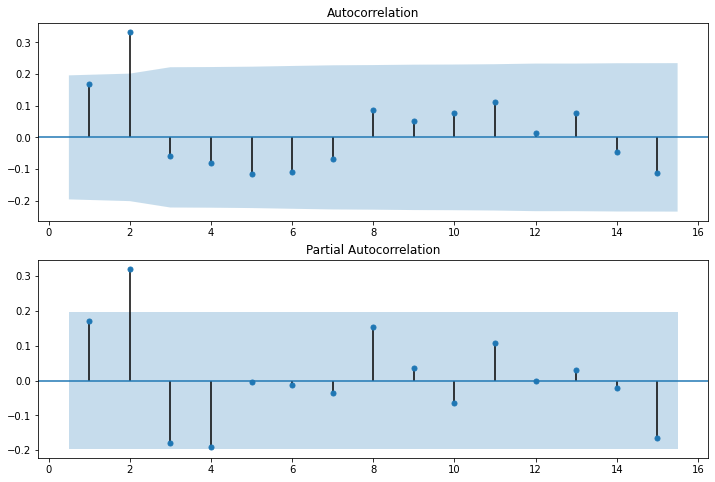

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(arma, lags=15, zero=False, ax=ax1)
plot_pacf(arma, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

### Entrenando modelos ARMA

In [23]:
from statsmodels.tsa.arima_model import ARMA
earthquake = pd.read_csv('earthquake.csv')

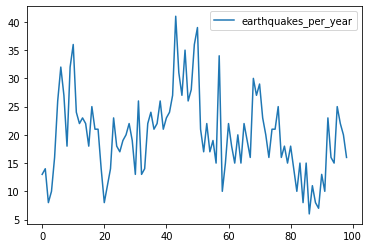

In [24]:
fig, ax = plt.subplots()
earthquake.plot(ax=ax) 
plt.show()

In [25]:
# Instanciar el modelo
model = ARMA(earthquake['earthquakes_per_year'], order=[3,1])
# Entrenar el modelo
results = model.fit()
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Thu, 21 May 2020   AIC                            643.345
Time:                          19:42:05   BIC                            658.916
Sample:                               0   HQIC                           649.645
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

### Proceso ARMAX

Modelo ARMA con adición de alguna variable exógena para que modele nuestra serie temporal

In [26]:
hospital=pd.read_csv('hospital.csv')
model = ARMA(hospital['wait_times_hrs'], order=[2,1],exog=hospital['nurse_count'])
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Thu, 21 May 2020   AIC                             35.668
Time:                        19:51:35   BIC                             54.411
Sample:                             0   HQIC                            43.275
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

### Obteniendo predicciones 

In [35]:
amazon=pd.read_csv('amazon.csv')
amazon['date'] = pd.to_datetime(amazon.date,format='%Y-%m-%d')
amazon=amazon.sort_values(by='date')
amazon.index = amazon.date
amazon=amazon.drop(columns=['date'])

In [36]:
amazon.head(10)

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35
2014-02-18,353.65
2014-02-19,347.38
2014-02-20,349.80
2014-02-21,346.76


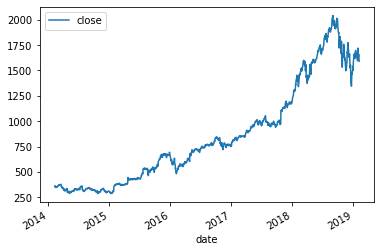

In [37]:
fig, ax = plt.subplots()
amazon.plot(ax=ax) 
plt.show()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model = SARIMAX(amazon, order=(2,0,3), trend='c') 
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -5546.502
Date:                Thu, 21 May 2020   AIC                          11107.003
Time:                        20:07:08   BIC                          11142.970
Sample:                             0   HQIC                         11120.520
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2745      0.842      0.326      0.745      -1.377       1.926
ar.L1          1.4213      1.343      1.058      0.290      -1.212       4.054
ar.L2         -0.4215      1.343     -0.314      0.7

In [39]:
one_step_forecast = results.get_prediction(start=-30) # observacion de inicio (ultimas 30 observaciones)
mean_forecast = one_step_forecast.predicted_mean 
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

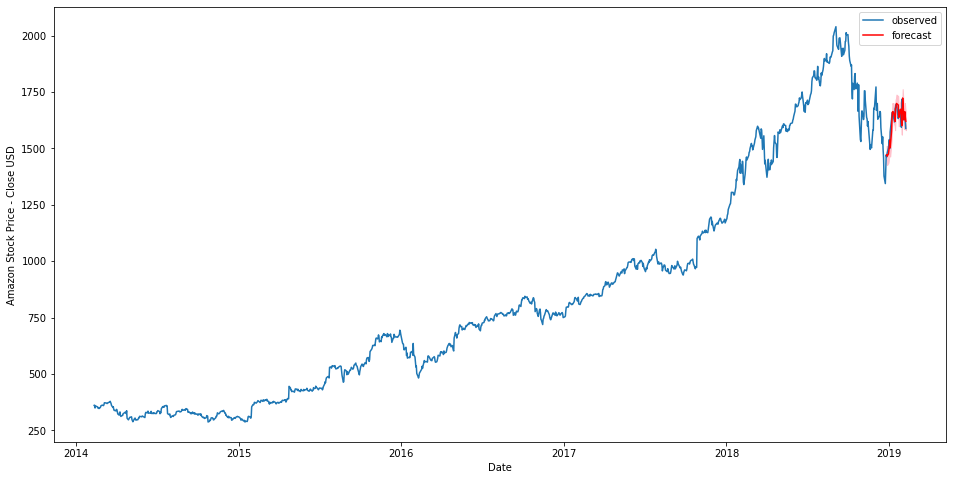

In [42]:
plt.figure(figsize=(16,8))
plt.plot(amazon.index, amazon, label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [43]:
arima = SARIMAX(amazon, order=(2,1,2))
arima_results = arima.fit()
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean
print(arima_value_forecast)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1593.616168
1260    1601.923159
1261    1605.501423
1262    1601.089164
1263    1592.775332
1264    1588.210552
1265    1591.566943
1266    1599.725132
1267    1605.173008
1268    1602.922780
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### ¿ MA, AR o  ARMA ? ¿ Cómo ver a qué tipo de modelo se ajusta un dato ?

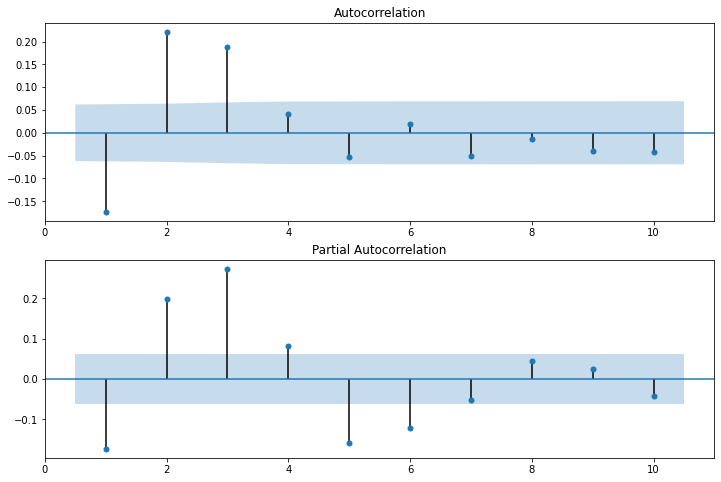

In [44]:
df = pd.read_csv('df_1.csv', index_col='date', parse_dates=True)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(df, lags=10, zero=False, ax=ax1)
plot_pacf(df, lags=10, zero=False, ax=ax2)
plt.show()

**P: ¿ Qué tipo de modelo se ajustaría mejor ?**

MA

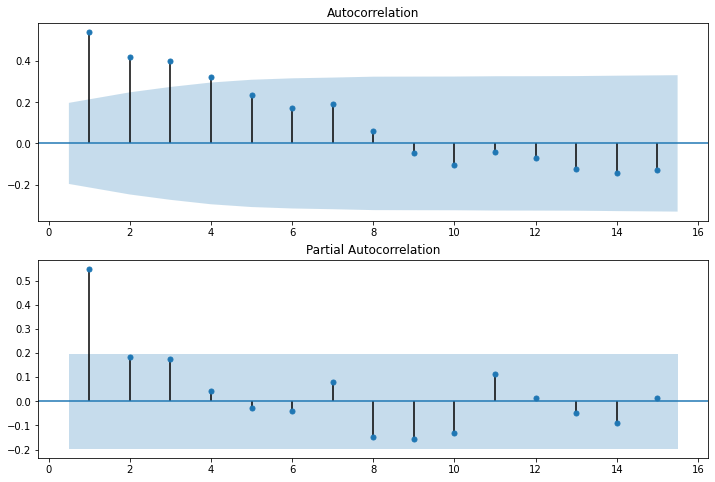

In [45]:
earthquake = pd.read_csv('earthquake.csv', index_col='date', parse_dates=True)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)
plt.show()

**P: ¿ Qué tipo de modelo se ajustaría mejor ?**

AR1

### Buscar los parámetros que mejor se ajusten usando los criterios de información

In [46]:
order_aic_bic=[]
for p in range(3):
    for q in range(3):
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        order_aic_bic.append((p,q,results.aic, results.bic))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/

In [47]:
print(order_aic_bic)

[(0, 0, 2996.526733716584, 3001.4344889955664), (0, 1, 2978.7269088598096, 2988.542419417774), (0, 2, 2872.205747533652, 2886.929013370598), (1, 0, 2969.236399484371, 2979.0519100423353), (1, 1, 2960.3511038004535, 2975.0743696373997), (1, 2, 2817.2924411981785, 2836.923462314107), (2, 0, 2930.2994808631183, 2945.0227467000645), (2, 1, 2889.542334777556, 2909.1733558934843), (2, 2, 2808.3091887303817, 2832.8479651252924)]


## Eligiendo el orden usando criterios AIC y BIC


Ahora que hemos creado muchos modelos, vamos evaluar los resultados para ver qué combinación es mejor para nuestra serie temporal.

In [ ]:
order_df = pd.DataFrame(order_aic_bic,columns=['p', 'q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC'))
print(order_df.sort_values('BIC'))

Ambos criterios coinciden en el modelo ARMA(1,2) pero no siempre será el caso

### Criterio AIC/BIC vs ACF/PACF

Vamos a aplicar ahora los criterios de información para buscar los paramétros óptimos para nuestro modelo ARMA, antes observando las funciones de autocorrelación y autocorrelación forzada determinamos que era AR(1)

Vamos a ver que pasa cuando hacemos la búsqueda de los parámetros basada en los criterios de información.


In [ ]:
for p in range(3):
    for q in range(3):      
        try:
            model = SARIMAX(earthquake,order=(p,0,q))
            results = model.fit()
            print(p, q, results.aic, results.bic)            
        except:
            print(p, q, None, None)

Si vemos los resultados que hemos imprimido por pantalla vemos que nos indica un modelo ARMA(1,1), no era lo que esperabamos ver inicialmente después de observar la ACF y la PACF, pero vamos que los valores de los lags 2 y 3 están muy cerca de ser significativos.

### Diagnóstico sobre el resumen de las estadísticas

Los residuos no están correlados si el valor p es menor que 0.05

Para ver si están correlados y distribuidos de forma normal Prob(Q) debe ser menor de 0.05

In [ ]:
model1 = SARIMAX(df, order=(1,1,1))
results1 = model1.fit()
print(results1.summary())

In [ ]:
results1.plot_diagnostics(figsize=(12, 10)) 
plt.show()

**P: ¿ Podríamos mejorar algo ?**

In [ ]:
model2 = SARIMAX(df, order=(3,0,1))
results2=model2.fit()
print(results2.summary())

In [ ]:
results2.plot_diagnostics(figsize=(12, 10)) 
plt.show()

In [ ]:
model = SARIMAX(df, order=(2,1,2))
results=model.fit()
results.plot_diagnostics(figsize=(12, 10)) 
plt.show()

# Box Jenkings

Vamos a cargar un dataframe con los ahorros de los ciudadanos estadounidenses en miles de dólares para llevar a cabo nuestra metodología de Box Jenkings

In [ ]:
savings = pd.read_csv('savings.csv', index_col='date', parse_dates=True)
savings.plot()
plt.show()

### Identificación

**P: ¿Estamos ante una serie temporal estacionaria ?**

In [ ]:
result = adfuller(savings['savings'])
print(result[0])
print(result[1])

**P: ¿ Qué tipo de modelo es mi serie ?**

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(savings, lags=10, zero=False, ax=ax1)
plot_pacf(savings, lags=10, zero=False, ax=ax2)
plt.show()

Podría tratarse de un modelo ARMA o AR 

### Estimación

In [ ]:
for p in range(4):
    for q in range(4):
      try:
        model = SARIMAX(savings, order=(p,0,q), trend='c')
        results = model.fit()
        print(p,q,results.aic,results.bic)        
      except:
        print(p, q, None, None)

AR(3) o ARMA(2,2)

### Diagnóstico

In [ ]:
model = SARIMAX(savings, order=(2,0,2), trend='c')
results = model.fit()
results.plot_diagnostics(figsize=(12, 10)) 
plt.show()
print(results.summary())

# Trabajando con series con estacionalidad

Usando un modelo de tipo SARIMA además de hacer el modelo regresivo al que estabamos acostumbrados podemos modelar tambien los efectos de la estacionalidad modelizando mediante coeficientes de igual forma que para el modelo ARIMA añadiendo también una supuesta periodicidad de esta estacionalidad de datos.

In [ ]:
timeseries = pd.read_csv('IPG2211A2N.csv', index_col='DATE', parse_dates=True)

In [ ]:
timeseries.head()

In [ ]:
timeseries = timeseries.asfreq('M', method='pad', how='start')
timeseries = timeseries['2008-01-01':]
timeseries.plot(title='Industrial Production Index 2008-2018');

In [ ]:
timeseries.head()

In [ ]:
test_result = adfuller(timeseries['IPG2211A2N'])
dfoutput = pd.Series(test_result[0:2], index=['Test Statistic','p-value'])
print(dfoutput)
if dfoutput[1] <= 0.05:
    print('La serie temporal es estacionaria')
else:
    print("La serie temporal no es estacionaria")

In [ ]:
timeseries_diff = timeseries.diff()
timeseries_diff.dropna(inplace=True)
timeseries_diff.head(10)

In [ ]:
test_result = adfuller(timeseries_diff['IPG2211A2N'])
dfoutput = pd.Series(test_result[0:2], index=['Test Statistic','p-value'])
print(dfoutput)
if dfoutput[1] <= 0.05:
    print('La serie temporal es estacionaria')
else:
    print("La serie temporal no es estacionaria")

In [ ]:
aic_list = []
p_range = d_range = q_range = range(0, 3)
for p in p_range:
    for d in d_range:
        for q in q_range:
            for P in p_range:
                for D in d_range:
                    for Q in q_range:
                        model = SARIMAX(timeseries,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False,
                                        seasonal_order=(P,D,Q,12),
                                        order=(p, d, q),
                                        freq='M')
                        # fit the model
                        ret = model.fit()
                        
                        # store the result of this model
                        aic_list.append((ret.aic, p, d, q, P, D, Q))

In [ ]:
sorted_list = sorted(aic_list, key=lambda x: x[0])

In [ ]:
sorted_list[0]

In [ ]:
training_data = timeseries
model = SARIMAX(training_data,
                enforce_stationarity=False,
                enforce_invertibility=False,
                seasonal_order=(0,2,2,12),
                order=(0, 1, 2),
                freq='M')
ret = model.fit()
print(ret.summary())

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(timeseries['2012':], color='black', label='Original Data', linewidth=1)
plt.plot(ret.fittedvalues['2012':], color='red', label='Fitted Data', linewidth=1)
plt.legend()
plt.title('Fitted Data vs Original');


In [ ]:
ret.plot_diagnostics(figsize=(12, 10))

In [ ]:
plt.figure(figsize=(16,8))
prediction = ret.get_prediction(start='2012-12-31',
                                end='2022-12-31')
fig = training_data.plot();
prediction.predicted_mean.plot(ax=fig)

prediction_confidence_interval = prediction.conf_int()
fig.fill_between(prediction_confidence_interval.index,
                 prediction_confidence_interval.iloc[:,0],
                 prediction_confidence_interval.iloc[:,1], alpha=0.5);